In [4]:
import networkx as nx
import xml.etree.ElementTree as ET

# Parse and format data

The data given was in xml format, so I had to parse it and manually build an edge list

NOTE: In the repository, it says that this is a non-directional binary graph, meaning that although the xml specifies a "source" and "target", there is no need to account for this while building the graph

In [21]:
data = []

tree = ET.parse('9_11_hijackers.xml')
root = tree.getroot()

for item in root.iter("link"):
    if((item.attrib['target'] != "Network Strength")&(item.attrib['target'] != "Ties")):
        p1 = item.attrib['source']
        p2 = item.attrib['target']
        data.append((p1, p2))


# Show network graph

Graph looks quite connected, however it seems that the nodes are are mostly centered around the two nodes in the middle. Furthermore, the outer nodes are still quite connected to the other other nodes near them. This seems to 

0.48243832670062176

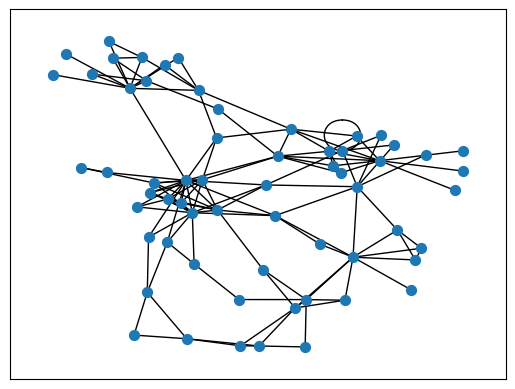

In [30]:
graph = nx.Graph()
graph.add_edges_from(data)
nx.draw_networkx(graph, with_labels=False, node_size=50)
nx.average_clustering(graph)

# Make a second graph and experiment with removing nodes

I'm going to create a second graph and then explore what happens when I remove a node. Basically, I clone the data into another variable and then remove a node from this data and pass it in to the new graph. 

By inspection, it looks like the best nodes to remove would be the most central ones. This is because it seems that most outher nodes are connected to them. To find out the node labels so that I can remove them, I'm going to look through the xml source file and find the nodes that appear the most.

These are a few of the most common nodes (by inspection):
Las Vegas Meeting
Essid Sami Ben Khemail
Djamal Benghal
Nawaf Alhazmi

To verify this, we can run a "betweenness_centrality"

In [23]:
nx.betweenness_centrality(graph)

{'Majed Moqed': 0.0,
 'Hani Hanjour': 0.10889830508474577,
 'Khalid Al-Mihdhar': 0.0033898305084745766,
 'Nawaf Alhazmi': 0.1885839834992379,
 'Salem Alhazmi*': 0.0,
 'Ahmed Alnami': 0.0,
 'Saeed Alghamdi*': 0.06121513765581559,
 'Hamza Alghamdi': 0.0458622545063223,
 'Ahmed Alghamdi': 0.0014124293785310734,
 'Ahmed Al Haznawi': 0.05850955071294059,
 'Mohand Alshehri*': 0.006569814366424535,
 'Ziad Jarrah': 0.09133440947000272,
 'Fayez Ahmed': 0.02455474845305354,
 'Marwan Al-Shehhi': 0.08536768002869695,
 'Mohamed Atta': 0.5235364541296744,
 'Abdul Aziz Al-Omari*': 0.04190655546587751,
 'Waleed Alshehri': 0.06592906465787826,
 'Wail Alshehri': 0.0,
 'Satam Suqami': 0.029778943592502896,
 'Raed Hijazi': 0.008412698412698415,
 'Nabil al-Marabh': 0.012461662631154153,
 'Mustafa Ahamend al-Hisawi': 0.05723612232086808,
 'Mamoun Darkazanli': 0.0,
 'Said Bahaji': 0.0021607927540130928,
 'Zakariya Essabar': 0.0,
 'Ramzi Bin al-Shibh': 0.0443547663886647,
 'Mounir El Motassadeq': 0.0,
 'Zacar

# Remove nodes

As suspected, the "Las Vagas Meeting" node and the "Essid Sami Ben Khemail" have the highest "centralness" (don't really know the right adjective to use here) score.

Let me try to remove the "Essid Sami Ben Khemail" node and see the results

You can see that the graph looks a little sparser by observation. But also if you look at the average clustering score, it has dropped from almost 50%, to 40%. This 10% might not seem like a lot, but considering how connected this graph was (the outer nodes are also all connected to their neighbours), its pretty impressive to have one node impact the score so much

0.408030188202602

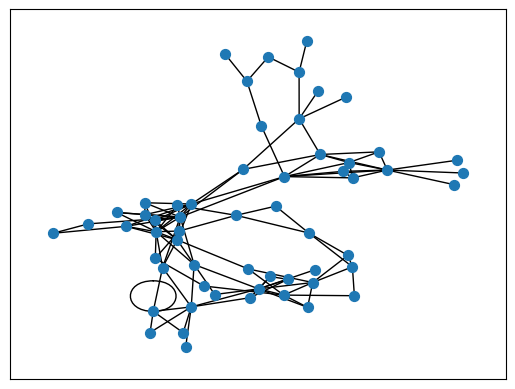

In [56]:
graph2 = nx.Graph()
data2 = [edge for edge in data if "Essid Sami Ben Khemail" not in edge]
graph2.add_edges_from(data2)
nx.draw_networkx(graph2, with_labels=False, node_size=50)
nx.average_clustering(graph2)